# Лабораторная работа №5. 
# "Древовидные модели: решающие деревья и их композиции"

# Задание 1а

- Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. 
- Осуществить настройку гиперпараметров. 
- Выполнить оценку качества модели, 
- визуализировать дерево решений, 
- вывести решающие правила. 
- Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)

## Подготовка

In [41]:
import pandas as pd
df_regr = pd.read_csv('../../Datasets/Lab3_DataSet3_Preprocesed.csv').drop('Unnamed: 0',axis=1)
df_clsf = pd.read_csv('../../Datasets/Lab4_DataSet4_Preprocessed.csv').drop('id',axis=1)

In [42]:
df_regr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30174 entries, 0 to 30173
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Mark_0               30174 non-null  int64
 1   Mark_1               30174 non-null  int64
 2   Mark_2               30174 non-null  int64
 3   Mark_3               30174 non-null  int64
 4   Mark_4               30174 non-null  int64
 5   Mark_5               30174 non-null  int64
 6   Mark_6               30174 non-null  int64
 7   Model_0              30174 non-null  int64
 8   Model_1              30174 non-null  int64
 9   Model_2              30174 non-null  int64
 10  Model_3              30174 non-null  int64
 11  Model_4              30174 non-null  int64
 12  Model_5              30174 non-null  int64
 13  Model_6              30174 non-null  int64
 14  Model_7              30174 non-null  int64
 15  Model_8              30174 non-null  int64
 16  Model_9              3

In [43]:
df_clsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399941 entries, 0 to 399940
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Airline_0      399941 non-null  int64
 1   Airline_1      399941 non-null  int64
 2   Airline_2      399941 non-null  int64
 3   Airline_3      399941 non-null  int64
 4   Airline_4      399941 non-null  int64
 5   Flight         399941 non-null  int64
 6   AirportFrom_0  399941 non-null  int64
 7   AirportFrom_1  399941 non-null  int64
 8   AirportFrom_2  399941 non-null  int64
 9   AirportFrom_3  399941 non-null  int64
 10  AirportFrom_4  399941 non-null  int64
 11  AirportFrom_5  399941 non-null  int64
 12  AirportFrom_6  399941 non-null  int64
 13  AirportFrom_7  399941 non-null  int64
 14  AirportFrom_8  399941 non-null  int64
 15  AirportTo_0    399941 non-null  int64
 16  AirportTo_1    399941 non-null  int64
 17  AirportTo_2    399941 non-null  int64
 18  AirportTo_3    399941 no

#### Уменьшение памяти

In [44]:
from my_methods import reduce_mem_usage

df_clsf = reduce_mem_usage(df_clsf)
df_regr = reduce_mem_usage(df_regr)

Потребление памяти на 73.61 Мб (минус 86.2 %)
Потребление памяти на 5.67 Мб (минус 84.9 %)


### Downsampling

In [45]:
from sklearn.utils import resample

neg_class = df_clsf[df_clsf['Delay'] == 0]
pos_class = df_clsf[df_clsf['Delay'] == 1]

neg_downsampled_class = resample(neg_class,n_samples=len(pos_class),random_state=42)
df_clsf = pd.concat((neg_downsampled_class,pos_class),axis=0)

#### Разбиение на тренировочную и тестовую выборку

In [46]:
from sklearn.model_selection import train_test_split

X_clsf = df_clsf.drop('Delay',axis=1)
Y_clsf = df_clsf['Delay']

x_train_clsf,\
x_test_clsf,\
y_train_clsf,\
y_test_clsf = train_test_split(X_clsf,Y_clsf,test_size=0.2, random_state=42)

X_regr = df_regr.drop('Price(euro)',axis=1)
Y_regr = df_regr['Price(euro)']

x_train_regr,\
x_test_regr,\
y_train_regr,\
y_test_regr = train_test_split(X_regr,Y_regr,test_size=0.2,random_state=42)

## DecisionTreeClassifier

In [47]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(x_train_clsf,y_train_clsf)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Решающие правила

In [48]:
print(tree.export_text(dtc))

|--- feature_25 <= 609.50
|   |--- feature_24 <= 5.50
|   |   |--- feature_25 <= 429.50
|   |   |   |--- class: 0
|   |   |--- feature_25 >  429.50
|   |   |   |--- class: 0
|   |--- feature_24 >  5.50
|   |   |--- feature_24 <= 6.50
|   |   |   |--- class: 0
|   |   |--- feature_24 >  6.50
|   |   |   |--- class: 0
|--- feature_25 >  609.50
|   |--- feature_24 <= 5.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|   |--- feature_24 >  5.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0



### Визуализация дерева

In [49]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(100,100))
plot_tree = tree.plot_tree(
                dtc,
                feature_names=X_clsf.columns,
                class_names=['Not Delay','Delay'],
                filled=True
            )
plt.savefig('../../classifier.pdf')

### Оценка качества модели

In [50]:
from sklearn.metrics import classification_report


dtc_y_pred = dtc.predict(x_test_clsf)
print(classification_report(y_test_clsf,dtc_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56     20155
           1       0.58      0.67      0.62     20187

    accuracy                           0.59     40342
   macro avg       0.59      0.59      0.59     40342
weighted avg       0.59      0.59      0.59     40342



### Настройка гиперпараметров

In [51]:
from sklearn.model_selection import RandomizedSearchCV

dtc = tree.DecisionTreeClassifier()
dtc_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 20)}

dtc_best_cv = RandomizedSearchCV(
    dtc, dtc_params, cv=5,verbose=True
).fit(x_train_clsf,y_train_clsf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [52]:
dtc_best_cv.best_params_

{'min_samples_split': 18, 'max_depth': 9}

In [53]:
dtc_best_cv_predict = dtc_best_cv.predict(x_test_clsf)
print(classification_report(y_test_clsf,dtc_best_cv_predict))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65     20155
           1       0.65      0.64      0.65     20187

    accuracy                           0.65     40342
   macro avg       0.65      0.65      0.65     40342
weighted avg       0.65      0.65      0.65     40342



## DecisionTreeRegressor

In [54]:
dtr = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(x_train_regr,y_train_regr)

DecisionTreeRegressor(max_depth=3, random_state=42)

### Решающие правила

In [55]:
print(tree.export_text(dtr))

|--- feature_17 <= 2011.50
|   |--- feature_17 <= 2006.50
|   |   |--- feature_17 <= 2001.50
|   |   |   |--- value: [2552.13]
|   |   |--- feature_17 >  2001.50
|   |   |   |--- value: [4062.64]
|   |--- feature_17 >  2006.50
|   |   |--- feature_23 <= 1771.00
|   |   |   |--- value: [5103.95]
|   |   |--- feature_23 >  1771.00
|   |   |   |--- value: [8364.72]
|--- feature_17 >  2011.50
|   |--- feature_23 <= 1958.50
|   |   |--- feature_17 <= 2015.50
|   |   |   |--- value: [8193.54]
|   |   |--- feature_17 >  2015.50
|   |   |   |--- value: [12465.02]
|   |--- feature_23 >  1958.50
|   |   |--- feature_17 <= 2015.50
|   |   |   |--- value: [14696.88]
|   |   |--- feature_17 >  2015.50
|   |   |   |--- value: [18058.35]



### Визуализация дерева

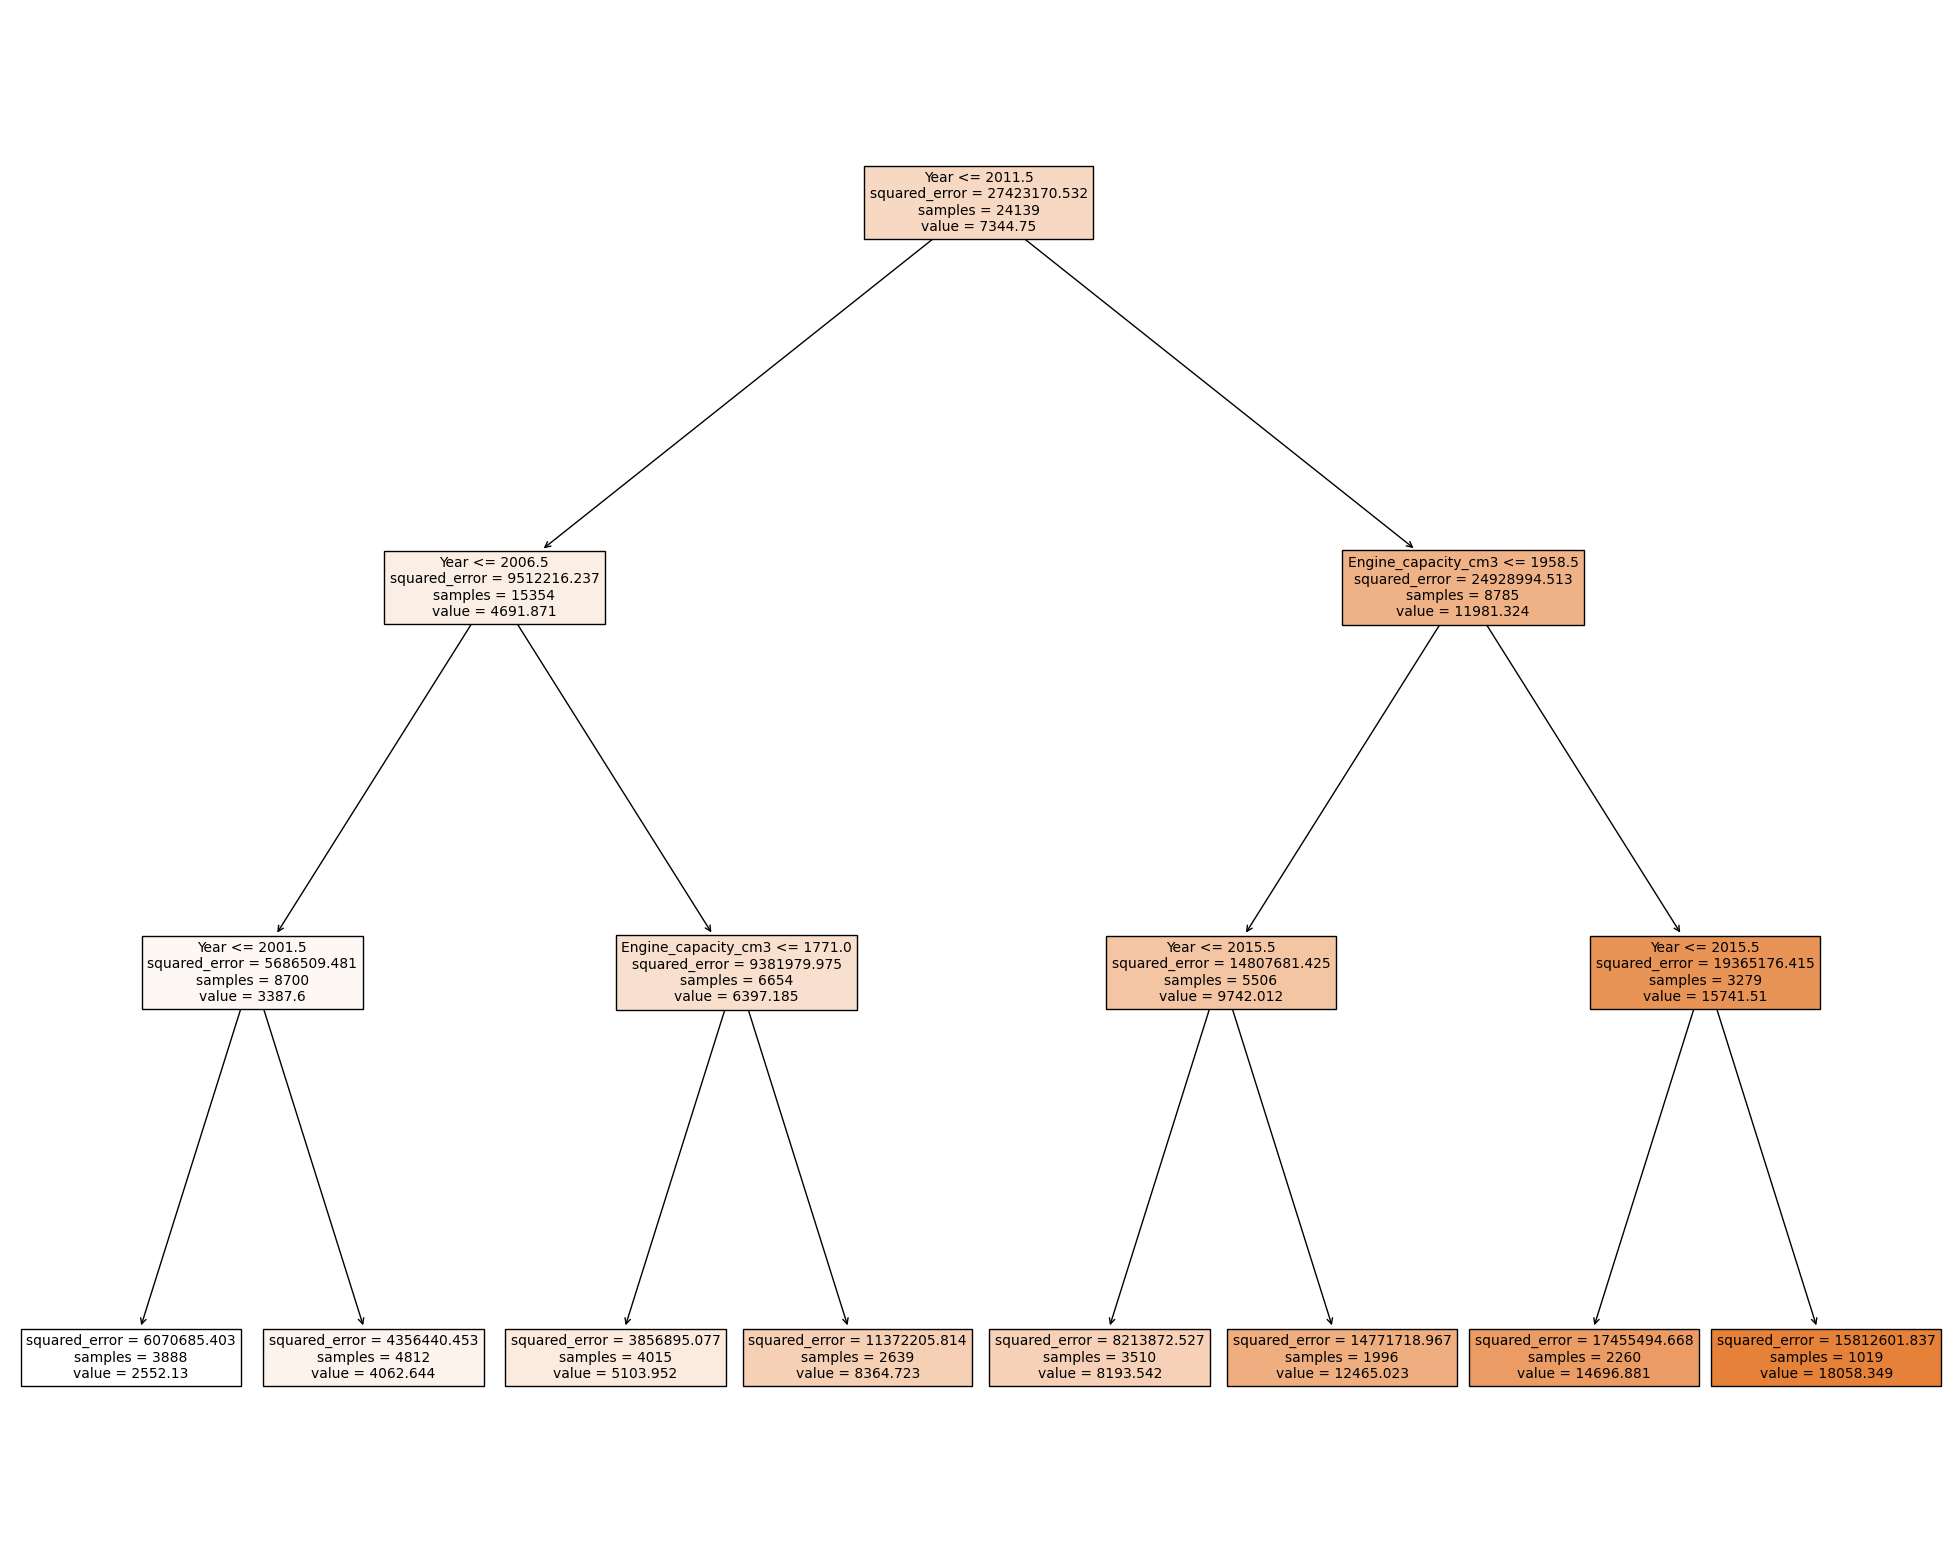

In [56]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    dtr, 
    feature_names=X_regr.columns, 
    filled=True
    )
plt.savefig('../../regressor.pdf')

### Оценка качества модели

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from math import sqrt

def regression_metrics(model_name: str, y_test, y_pred,output_list=False) -> None:
    
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = sqrt(MSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = r2_score(y_test,y_pred)

    print(model_name)
    print(f'MSE = {round(MSE,3)}')
    print(f'MAE = {round(MAE,3)}')
    print(f'RMSE = {round(RMSE,3)}')
    print(f'MAPE = {round(MAPE,3)}')
    print(f'R^2 = {round(R2,3)}')
    print('')
    if output_list:
        return [MSE,MAE,RMSE,MAPE,R2,model_name]

In [58]:
dtr_y_pred = dtr.predict(x_test_regr)
regression_metrics('Desision tree regressor',y_test_regr,dtr_y_pred)

Desision tree regressor
MSE = 8432120.099
MAE = 2142.064
RMSE = 2903.811
MAPE = 0.523
R^2 = 0.694



### Настройка гиперпараметров

In [59]:
dtr = tree.DecisionTreeRegressor()
dtr_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 20),
               "min_samples_leaf": range(2,20)}

dtr_best_cv = RandomizedSearchCV(
    dtr, dtr_params, cv=5,verbose=True
).fit(x_train_regr,y_train_regr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [60]:
dtr_best_cv.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 16, 'max_depth': 13}

In [61]:
dtr_best_cv_predict = dtr_best_cv.predict(x_test_regr)
regression_metrics('Desision tree regressor',y_test_regr,dtr_best_cv_predict)

Desision tree regressor
MSE = 5102154.616
MAE = 1494.937
RMSE = 2258.795
MAPE = 0.389
R^2 = 0.815



# Задание 1б

Б). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

**Выполнено в Lab5_CART.ipynb**

# Задание 2 

Применить ансамбли для наборов данных своего варианта:
- BaggingClassifier
- BaggingRegressor

- GradientBoostingClassifier
- GradientBoostingRegressor

- StackingClassifier
- StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

## BaggingClassifier

In [62]:
from sklearn.ensemble import BaggingClassifier

estimator = tree.DecisionTreeClassifier(max_depth=5,random_state=42)
bagging_clsf = BaggingClassifier(estimator)
bagging_clsf.fit(x_train_clsf,y_train_clsf)

bagging_clsf_y_pred = bagging_clsf.predict(x_test_clsf)
print(classification_report(y_test_clsf,bagging_clsf_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.65     20155
           1       0.64      0.57      0.61     20187

    accuracy                           0.63     40342
   macro avg       0.63      0.63      0.63     40342
weighted avg       0.63      0.63      0.63     40342



## BaggingRegressor

In [63]:
from sklearn.ensemble import BaggingRegressor

estimator = tree.DecisionTreeRegressor(max_depth=5,random_state=42)
bagging_regr = BaggingRegressor(estimator)
bagging_regr.fit(x_train_regr,y_train_regr)

bagging_regr_y_pred = bagging_regr.predict(x_test_regr)
bagging_regr_metrics = regression_metrics('BaggingRegressor',y_test_regr,bagging_regr_y_pred,output_list=True)

BaggingRegressor
MSE = 6339019.352
MAE = 1787.765
RMSE = 2517.741
MAPE = 0.436
R^2 = 0.77



## GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_clsf = GradientBoostingClassifier()
gradient_boosting_clsf.fit(x_train_clsf,y_train_clsf)

gradient_boosting_clsf_y_pred = gradient_boosting_clsf.predict(x_test_clsf)
print(classification_report(y_test_clsf,gradient_boosting_clsf_y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     20155
           1       0.65      0.64      0.64     20187

    accuracy                           0.65     40342
   macro avg       0.65      0.65      0.65     40342
weighted avg       0.65      0.65      0.65     40342



## GradientBoostingRegressor

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_regr = GradientBoostingRegressor()
gradient_boosting_regr.fit(x_train_regr,y_train_regr)

gradient_boosting_regr_y_pred = gradient_boosting_regr.predict(x_test_regr)
gradient_boosting_regr_metrics = regression_metrics('GradientBoostingRegressor',y_test_regr,gradient_boosting_regr_y_pred,output_list=True)

GradientBoostingRegressor
MSE = 4965696.447
MAE = 1533.05
RMSE = 2228.384
MAPE = 0.384
R^2 = 0.82



## StackingClassifier

In [66]:
from sklearn.ensemble import StackingClassifier

estimators = [('DecisionTreeClassifier',tree.DecisionTreeClassifier(max_depth=5,random_state=42))]
stacking_clsf = StackingClassifier(estimators)
stacking_clsf.fit(x_train_clsf,y_train_clsf)

stacking_clsf_y_pred = stacking_clsf.predict(x_test_clsf)
print(classification_report(y_test_clsf,stacking_clsf_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64     20155
           1       0.64      0.57      0.60     20187

    accuracy                           0.62     40342
   macro avg       0.63      0.62      0.62     40342
weighted avg       0.63      0.62      0.62     40342



## StackingRegressor

In [67]:
from sklearn.ensemble import StackingRegressor

estimators = [('StackingRegressor',tree.DecisionTreeRegressor(max_depth=5,random_state=42))]
stacking_regr = StackingRegressor(estimators)
stacking_regr.fit(x_train_regr,y_train_regr)

stacking_regr_y_pred = stacking_regr.predict(x_test_regr)
stacking_regr_metrics = regression_metrics('StackingRegressor',y_test_regr,stacking_regr_y_pred,output_list=True)

StackingRegressor
MSE = 6572420.621
MAE = 1822.716
RMSE = 2563.673
MAPE = 0.444
R^2 = 0.762



## Выбор лучшей модели

### Классификация

In [68]:
def from_dict_to_df(model_name: str, model_report: dict) -> pd.DataFrame:
    model_report = pd.DataFrame(model_report).round(3).T
    model_report = model_report.drop(index=['macro avg','weighted avg'],columns=['support'])
    model_report['classifier-model'] = model_name
    return model_report

In [69]:
best_clsf_models = pd.DataFrame()

clsf_reports = [
    ('Bagging', classification_report(y_test_clsf, bagging_clsf_y_pred,output_dict=True)),
    ('Gradient_boosting', classification_report(y_test_clsf,gradient_boosting_clsf_y_pred,output_dict=True)),
    ('Stacking', classification_report(y_test_clsf, stacking_clsf_y_pred,output_dict=True))
]

for model_name,model_report in clsf_reports:
    model_report = from_dict_to_df(model_name,model_report)
    if best_clsf_models.empty:
        best_clsf_models = model_report
    else:
        best_clsf_models = pd.concat([best_clsf_models,model_report])

In [70]:
best_clsf_models

,precision,recall,f1-score,classifier-model
0,0.614,0.681,0.646,Bagging
1,0.643,0.573,0.606,Bagging
accuracy,0.627,0.627,0.627,Bagging
0,0.644,0.652,0.648,Gradient_boosting
1,0.648,0.641,0.645,Gradient_boosting
accuracy,0.646,0.646,0.646,Gradient_boosting
0,0.612,0.681,0.645,Stacking
1,0.641,0.568,0.602,Stacking
accuracy,0.625,0.625,0.625,Stacking


In [71]:
best_clsf_models.sort_values('precision')

,precision,recall,f1-score,classifier-model
0,0.612,0.681,0.645,Stacking
0,0.614,0.681,0.646,Bagging
accuracy,0.625,0.625,0.625,Stacking
accuracy,0.627,0.627,0.627,Bagging
1,0.641,0.568,0.602,Stacking
1,0.643,0.573,0.606,Bagging
0,0.644,0.652,0.648,Gradient_boosting
accuracy,0.646,0.646,0.646,Gradient_boosting
1,0.648,0.641,0.645,Gradient_boosting


In [72]:
best_clsf_models.sort_values('recall')

,precision,recall,f1-score,classifier-model
1,0.641,0.568,0.602,Stacking
1,0.643,0.573,0.606,Bagging
accuracy,0.625,0.625,0.625,Stacking
accuracy,0.627,0.627,0.627,Bagging
1,0.648,0.641,0.645,Gradient_boosting
accuracy,0.646,0.646,0.646,Gradient_boosting
0,0.644,0.652,0.648,Gradient_boosting
0,0.614,0.681,0.646,Bagging
0,0.612,0.681,0.645,Stacking


In [73]:
best_clsf_models.sort_values('f1-score')

,precision,recall,f1-score,classifier-model
1,0.641,0.568,0.602,Stacking
1,0.643,0.573,0.606,Bagging
accuracy,0.625,0.625,0.625,Stacking
accuracy,0.627,0.627,0.627,Bagging
1,0.648,0.641,0.645,Gradient_boosting
0,0.612,0.681,0.645,Stacking
0,0.614,0.681,0.646,Bagging
accuracy,0.646,0.646,0.646,Gradient_boosting
0,0.644,0.652,0.648,Gradient_boosting


### Регрессия

In [74]:

best_regr_models = pd.DataFrame(columns=['MSE','MAE','RMSE','MAPE','R^2','Regression_model'])

regr_reports = [
    bagging_regr_metrics,
    gradient_boosting_regr_metrics,
    stacking_regr_metrics
]

for model_report in regr_reports:
    best_regr_models.loc[len(best_regr_models)] = model_report

best_regr_models = best_regr_models.round(3)
best_regr_models.sort_values('MSE',ignore_index=True)

,MSE,MAE,RMSE,MAPE,R^2,Regression_model
0,4965696.447,1533.050,2228.384,0.384,0.820,GradientBoostingRegressor
1,6339019.352,1787.765,2517.741,0.436,0.770,BaggingRegressor
2,6572420.621,1822.716,2563.673,0.444,0.762,StackingRegressor


# Задание 3

Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:
- Catboost,
- XGBoost,
- LightGBM
Выполнить оценку качества моделей и выбрать лучшую модель.

## CatBoost

### Классификация

In [75]:
from catboost import CatBoostClassifier

catboost_clsf = CatBoostClassifier()
catboost_clsf.fit(x_train_clsf,y_train_clsf)
catboost_clsf_y_pred = catboost_clsf.predict(x_test_clsf)

print(classification_report(y_test_clsf, catboost_clsf_y_pred))

catboost_clsf_report = classification_report(y_test_clsf, catboost_clsf_y_pred,output_dict=True)
catboost_clsf_report = from_dict_to_df('cat_boost',catboost_clsf_report)

Learning rate set to 0.090296


0:	learn: 0.6833232	total: 219ms	remaining: 3m 38s
1:	learn: 0.6756135	total: 279ms	remaining: 2m 19s
2:	learn: 0.6694634	total: 329ms	remaining: 1m 49s
3:	learn: 0.6639102	total: 389ms	remaining: 1m 36s
4:	learn: 0.6595414	total: 452ms	remaining: 1m 29s
5:	learn: 0.6555448	total: 574ms	remaining: 1m 35s
6:	learn: 0.6522435	total: 654ms	remaining: 1m 32s
7:	learn: 0.6496517	total: 695ms	remaining: 1m 26s
8:	learn: 0.6474547	total: 726ms	remaining: 1m 19s
9:	learn: 0.6457217	total: 758ms	remaining: 1m 15s
10:	learn: 0.6443397	total: 798ms	remaining: 1m 11s
11:	learn: 0.6427761	total: 828ms	remaining: 1m 8s
12:	learn: 0.6401222	total: 865ms	remaining: 1m 5s
13:	learn: 0.6388083	total: 898ms	remaining: 1m 3s
14:	learn: 0.6377929	total: 959ms	remaining: 1m 2s
15:	learn: 0.6370041	total: 1.01s	remaining: 1m 2s
16:	learn: 0.6352991	total: 1.06s	remaining: 1m 1s
17:	learn: 0.6345320	total: 1.09s	remaining: 59.5s
18:	learn: 0.6332280	total: 1.12s	remaining: 58s
19:	learn: 0.6323391	total: 1.15

In [76]:
best_clsf_models = pd.concat([best_clsf_models,catboost_clsf_report])

### Регрессия

In [77]:
from catboost import CatBoostRegressor

catboost_regr = CatBoostRegressor()
catboost_regr.fit(x_train_regr, y_train_regr)
catboost_regr_pred = catboost_regr.predict(x_test_regr)

catboost_regr_report = regression_metrics('catboost',y_test_regr,catboost_regr_pred,output_list=True)
best_regr_models.loc[len(best_regr_models)] = catboost_regr_report

Learning rate set to 0.067709
0:	learn: 4983.0276548	total: 12.2ms	remaining: 12.2s


1:	learn: 4749.5385105	total: 24.2ms	remaining: 12.1s
2:	learn: 4536.9537058	total: 33.7ms	remaining: 11.2s
3:	learn: 4344.7316773	total: 45.2ms	remaining: 11.2s
4:	learn: 4164.2065944	total: 56.1ms	remaining: 11.2s
5:	learn: 4014.1632195	total: 64.3ms	remaining: 10.7s
6:	learn: 3863.3078702	total: 76ms	remaining: 10.8s
7:	learn: 3731.3980629	total: 87.4ms	remaining: 10.8s
8:	learn: 3606.0886186	total: 94.8ms	remaining: 10.4s
9:	learn: 3491.4863711	total: 110ms	remaining: 10.8s
10:	learn: 3389.5283047	total: 124ms	remaining: 11.2s
11:	learn: 3293.7843184	total: 140ms	remaining: 11.5s
12:	learn: 3209.1949726	total: 176ms	remaining: 13.3s
13:	learn: 3134.1533389	total: 191ms	remaining: 13.5s
14:	learn: 3063.8197373	total: 223ms	remaining: 14.7s
15:	learn: 3002.6974253	total: 239ms	remaining: 14.7s
16:	learn: 2942.8668367	total: 253ms	remaining: 14.6s
17:	learn: 2889.7229245	total: 269ms	remaining: 14.7s
18:	learn: 2838.7400827	total: 290ms	remaining: 15s
19:	learn: 2795.0043601	total: 30

## XGBoost

### Классификация

In [78]:
from xgboost import XGBClassifier

xgboost_clsf = XGBClassifier()
xgboost_clsf.fit(x_train_clsf,y_train_clsf)
xgboost_clsf_predict = xgboost_clsf.predict(x_test_clsf)

print(classification_report(y_test_clsf,xgboost_clsf_predict))

xgboost_clsf_report = classification_report(y_test_clsf,xgboost_clsf_predict,output_dict=True)
xgboost_clsf_report = from_dict_to_df('xgboost',xgboost_clsf_report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.68     20155
           1       0.68      0.65      0.66     20187

    accuracy                           0.67     40342
   macro avg       0.67      0.67      0.67     40342
weighted avg       0.67      0.67      0.67     40342



In [79]:
best_clsf_models = pd.concat([best_clsf_models,xgboost_clsf_report])

### Регрессия

In [80]:
from xgboost import XGBRegressor

xgboost_regr = XGBRegressor()
xgboost_regr.fit(x_train_regr, y_train_regr)
xgboost_regr_predict = xgboost_regr.predict(x_test_regr)

xgboost_regr_report = regression_metrics('xgboost',y_test_regr,xgboost_regr_predict,output_list=True)
best_regr_models.loc[len(best_regr_models)] = xgboost_regr_report

xgboost
MSE = 4023560.75
MAE = 1302.64404296875
RMSE = 2005.882
MAPE = 0.354
R^2 = 0.854



## LightGBM

### Классификация

In [81]:
from lightgbm import LGBMClassifier

lightGBM_clsf = LGBMClassifier()
lightGBM_clsf.fit(x_train_clsf,y_train_clsf)
lightGBM_clsf_predict = lightGBM_clsf.predict(x_test_clsf)

print(classification_report(y_test_clsf,lightGBM_clsf_predict))

lightGBM_clsf_report = classification_report(y_test_clsf,lightGBM_clsf_predict,output_dict=True)
lightGBM_clsf_report = from_dict_to_df('lightGBM',lightGBM_clsf_report)

[LightGBM] [Info] Number of positive: 80667, number of negative: 80699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 161366, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499901 -> initscore=-0.000397
[LightGBM] [Info] Start training from score -0.000397
              precision    recall  f1-score   support

           0       0.65      0.70      0.68     20155
           1       0.68      0.63      0.65     20187

    accuracy                           0.66     40342
   macro avg       0.67      0.66      0.66     40342
weighted avg       0.67      0.66      0.66     40342



In [82]:
best_clsf_models = pd.concat([best_clsf_models,lightGBM_clsf_report])

### Регрессия

In [83]:
from lightgbm import LGBMRegressor

lightGBM_regr = LGBMRegressor()
lightGBM_regr.fit(x_train_regr, y_train_regr)
lightGBM_regr_predict = lightGBM_regr.predict(x_test_regr)

lightGBM_regr_report = regression_metrics('lightGBM',y_test_regr,lightGBM_regr_predict,output_list=True)
best_regr_models.loc[len(best_regr_models)] = lightGBM_regr_report

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 533
[LightGBM] [Info] Number of data points in the train set: 24139, number of used features: 28
[LightGBM] [Info] Start training from score 7344.750072
lightGBM
MSE = 4049565.205
MAE = 1332.28
RMSE = 2012.353
MAPE = 0.358
R^2 = 0.853



## Наилучшие модели

### Классификация

In [84]:
best_clsf_models.head(6)

,precision,recall,f1-score,classifier-model
0,0.614,0.681,0.646,Bagging
1,0.643,0.573,0.606,Bagging
accuracy,0.627,0.627,0.627,Bagging
0,0.644,0.652,0.648,Gradient_boosting
1,0.648,0.641,0.645,Gradient_boosting
accuracy,0.646,0.646,0.646,Gradient_boosting


In [85]:
not_delay = best_clsf_models.loc['0']
delay = best_clsf_models.loc['1']
accuracy = best_clsf_models.loc['accuracy']

In [86]:
not_delay.sort_values('precision',ascending=False)

,precision,recall,f1-score,classifier-model
0,0.665,0.694,0.679,cat_boost
0,0.664,0.694,0.679,xgboost
0,0.652,0.703,0.677,lightGBM
0,0.644,0.652,0.648,Gradient_boosting
0,0.614,0.681,0.646,Bagging
0,0.612,0.681,0.645,Stacking


In [87]:
delay.sort_values('precision',ascending=False)

,precision,recall,f1-score,classifier-model
1,0.681,0.651,0.665,cat_boost
1,0.680,0.649,0.665,xgboost
1,0.679,0.626,0.651,lightGBM
1,0.648,0.641,0.645,Gradient_boosting
1,0.643,0.573,0.606,Bagging
1,0.641,0.568,0.602,Stacking


In [88]:
# accuracy
z = accuracy.reset_index().drop('index',axis=1)
z = z.rename({'f1-score': 'accuracy'},axis=1)[['accuracy','classifier-model']]
z.sort_values(by='accuracy',ascending=False,ignore_index=True)

,accuracy,classifier-model
0,0.673,cat_boost
1,0.672,xgboost
2,0.665,lightGBM
3,0.646,Gradient_boosting
4,0.627,Bagging
5,0.625,Stacking


### Регрессия

In [89]:
best_regr_models.sort_values('MSE') 

,MSE,MAE,RMSE,MAPE,R^2,Regression_model
3,3.786777e+06,1269.613823,1945.964170,0.348042,0.862796,catboost
4,4.023561e+06,1302.644409,2005.881539,0.353698,0.854217,xgboost
5,4.049565e+06,1332.279650,2012.353151,0.357939,0.853275,lightGBM
1,4.965696e+06,1533.050000,2228.384000,0.384000,0.820000,GradientBoostingRegressor
0,6.339019e+06,1787.765000,2517.741000,0.436000,0.770000,BaggingRegressor
2,6.572421e+06,1822.716000,2563.673000,0.444000,0.762000,StackingRegressor
